In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [3]:
#Data loading 
train_dir = r'/kaggle/input/janvi-cat-dog1/dataset/training_set'
test_dir = r'/kaggle/input/janvi-cat-dog1/dataset/test_set'
single_pred_dir = r'/kaggle/input/janvi-cat-dog1/dataset/single_prediction'

In [4]:
#Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
#Building CNN
cnn = Sequential()

In [6]:
#Convolution
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Pooling
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [8]:
#Adding a second convolution layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [9]:
#Flattening
cnn.add(Flatten())

In [10]:
#Full connection
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Prevent overfitting
cnn.add(Dense(units=1, activation='sigmoid'))

In [11]:
#Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
#Training the CNN on Training set and evaluating on Test set
history = cnn.fit(x=train_generator, validation_data=test_generator, epochs=25)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 269ms/step - accuracy: 0.5473 - loss: 0.6830 - val_accuracy: 0.6685 - val_loss: 0.6024
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 180ms/step - accuracy: 0.6570 - loss: 0.6177 - val_accuracy: 0.7225 - val_loss: 0.5654
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 182ms/step - accuracy: 0.7087 - loss: 0.5708 - val_accuracy: 0.7250 - val_loss: 0.5535
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 183ms/step - accuracy: 0.7336 - loss: 0.5423 - val_accuracy: 0.7605 - val_loss: 0.4966
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 183ms/step - accuracy: 0.7512 - loss: 0.5078 - val_accuracy: 0.7405 - val_loss: 0.5296
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.7606 - loss: 0.4964 - val_accuracy: 0.7750 - val_loss: 0.4780
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.7678 - loss: 0.4831 - val_accuracy: 0.7680 - val_loss: 0.4775
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 180ms/step - accuracy: 0.7682 - loss: 0.4796 - val

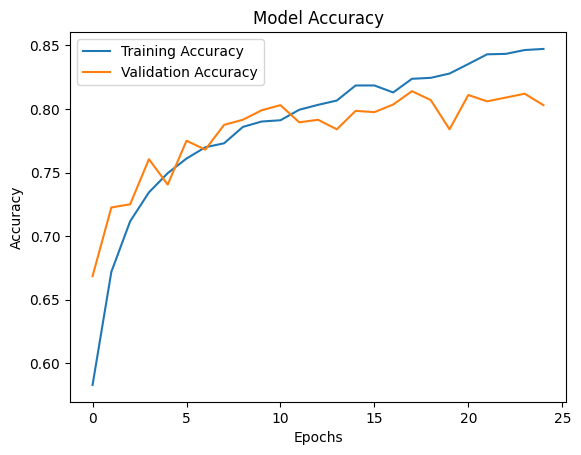

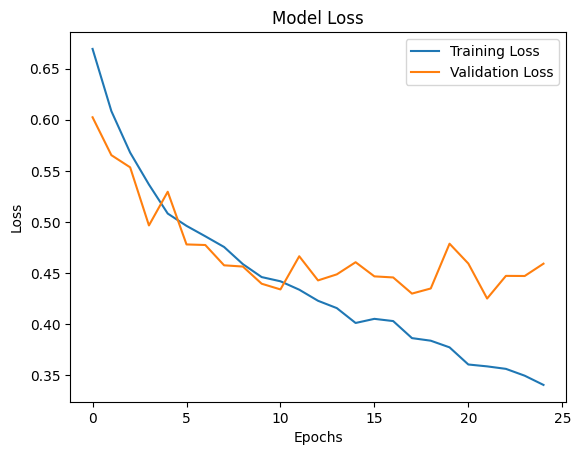

In [13]:
#Making a single prediction

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.0  # Rescale

    prediction = cnn.predict(test_image)
    if prediction[0][0] >= 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


predict_image('/kaggle/input/janvi-cat-dog1/dataset/single_prediction/cat_or_dog_1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction: Dog
